In [ ]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
# Diretório contendo os arquivos JSON
directory = '/content/drive/MyDrive/aula01/Exercicio/'

# Listar todos os arquivos JSON no diretório
files = glob.glob(os.path.join(directory, '*.json'))

# Ler todos os arquivos JSON e combiná-los em um único DataFrame

df_InfoDeputados=pd.read_json('/content/drive/MyDrive/aula01/Exercicio/Data_info/Info_Deputados.json')


dfs = [pd.read_json(file) for file in files]
df = pd.concat(dfs, ignore_index=True)




In [ ]:
df=df.drop_duplicates()
df_InfoDeputados=df_InfoDeputados.drop_duplicates()

df.set_index('id',inplace=True)
df_InfoDeputados.set_index('id',inplace=True)

df=df.join(df_InfoDeputados,on='id')


# 1-	Quais deputados gastaram mais no ano analisado

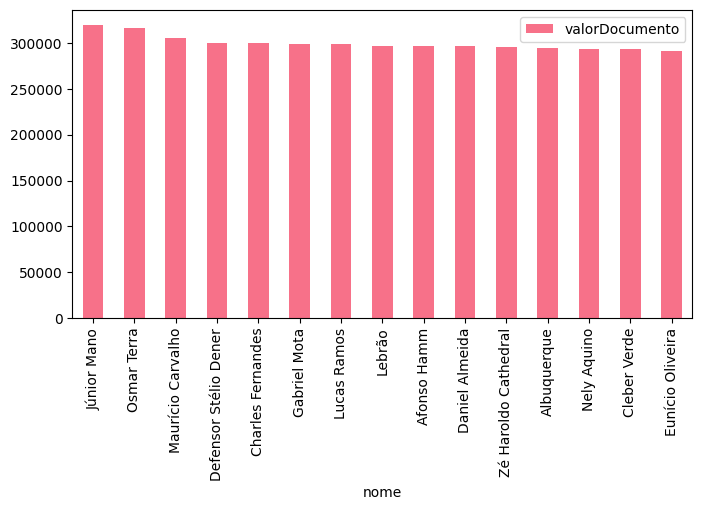

In [ ]:
TotalDeGastos=df[['nome', 'valorDocumento']].groupby('nome').sum().sort_values('valorDocumento', ascending=False).head(15)


cors = sns.color_palette('husl',len(TotalDeGastos))

TotalDeGastos.plot.bar(figsize=(8,4),color=cors)


plt.show()

# 2- Quais foram os principais gastos dos deputados neste ano?

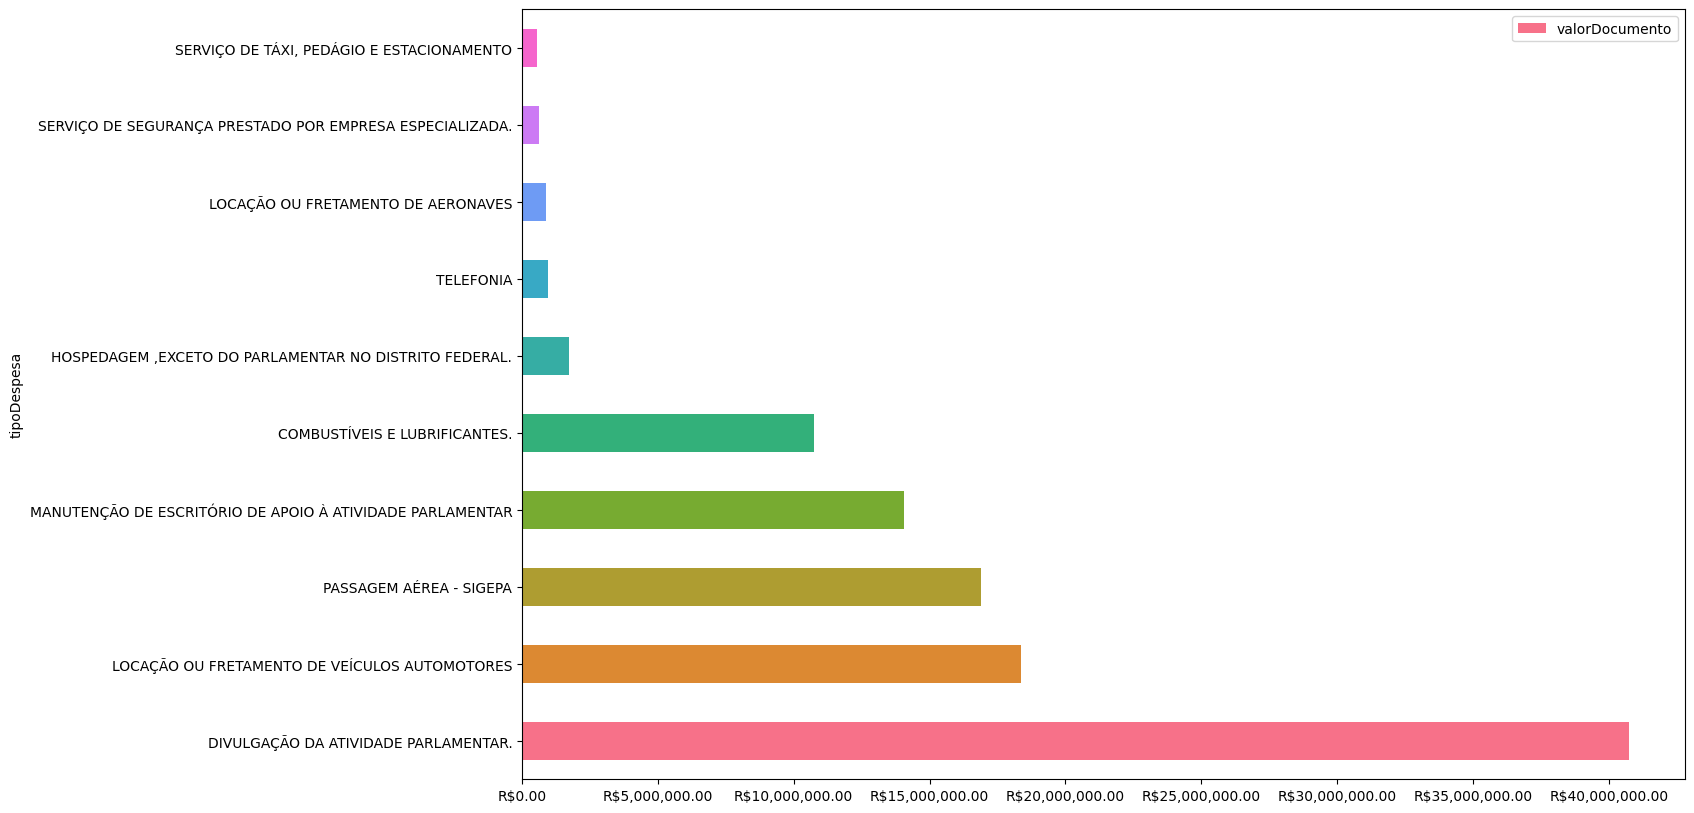

In [ ]:
TotalTipoDepsesas=df[['tipoDespesa','valorDocumento']].groupby('tipoDespesa').sum('valorDocumento').sort_values('valorDocumento', ascending=False).head(10)

corsCateg = sns.color_palette('husl',len(TotalTipoDepsesas))

def format_currency(value, _):
    return f'R${value:,.2f}'

ax=TotalTipoDepsesas.plot.barh(y='valorDocumento',color=corsCateg,figsize=(15,10))

ax.xaxis.set_major_formatter(FuncFormatter(format_currency))

plt.show()

# 3 -	Há gastos que levantam algum tipo de suspeita?

In [ ]:
df[['nome','nomeFornecedor','valorDocumento','tipoDespesa']]\
  .groupby(['nomeFornecedor','tipoDespesa','nome'])\
  .sum('valorDocumento')\
  .sort_values('valorDocumento', ascending=False).head(10)


,,,valorDocumento
nomeFornecedor,tipoDespesa,nome,
CARNAUBA ASSESSORIA DE COM E PIBLICIDADE,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,Eunício Oliveira,256300.0
ORBE PRODUTORA & SERVIÇOS LTDA,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,Dorinaldo Malafaia,236000.0
Dinamic Comercio e Serviços Eireli,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,Olival Marques,215000.0
GALZON EDITORA GRAFICA LTDA,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,Giacobo,197650.0
WORKING ASSOCIAÇÃO DE INTEGRAÇÃO PROFISSIONAL,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,Erika Kokay,187990.0
Duporto agencia de publicidade ltda,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,Clodoaldo Magalhães,162000.0
"ON - Z IMPRESSAO, DIVULGACAO & MARKETING DIGITAL LTDA",DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,Alice Portugal,156054.0
Atos Cobrança e Serviços Especializados Unipessoal LTDA,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,Yury do Paredão,153000.0
DIAMOND COMERCIO E SERVICOS LTDA - DIAMOND,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,Mauricio do Vôlei,150000.0
